In [20]:
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### CARGA

Para esta etapa simplemente se cargaron los datos de los cvs para los meses febrero a marzo y abril a mayo y se concatenaron en un unico dataframe. Se realizo una exploracion de datos simple para ver el numero de filas, columnas y el tipo de dato para cada columna. Tambien se realizo una .sample() para familiarizarse con los datos.

In [21]:
datos_feb_mar = pd.read_csv('datos_feb-mar.csv', sep=',', encoding='utf-8')
datos_abril_may = pd.read_csv('datos_abril-may.csv', sep=',', encoding='utf-8')


In [22]:
# Join de los dos dataframes
datos = pd.concat([datos_feb_mar, datos_abril_may], ignore_index=True)
datos

,fecha_completa,MES,DIA,MODO_ACCESO,PORTERIA,RESULTADO_EVENTO,ROL,TIPO_ACCESO
0,2/4/2019 0:53,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
1,2/4/2019 0:55,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT
2,2/4/2019 0:56,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
3,2/4/2019 1:16,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,EMPLEADO ...,IN
4,2/4/2019 1:29,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT
...,...,...,...,...,...,...,...,...
1341128,5/29/2019 23:20,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT
1341129,5/29/2019 23:24,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
1341130,5/29/2019 23:24,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
1341131,5/29/2019 23:30,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT


In [23]:
datos.shape

(1341133, 8)

In [24]:
datos.dtypes

fecha_completa      object
MES                 object
DIA                  int64
MODO_ACCESO         object
PORTERIA            object
RESULTADO_EVENTO    object
ROL                 object
TIPO_ACCESO         object
dtype: object

In [25]:
datos.sample(5)

,fecha_completa,MES,DIA,MODO_ACCESO,PORTERIA,RESULTADO_EVENTO,ROL,TIPO_ACCESO
634711,3/19/2019 19:56,Marzo,19,Vehicular,SD,Access Grant: Access Granted Local,ESTUDIANTE ...,OUT
1166724,5/8/2019 15:28,Mayo,8,Peatonal,SD,Access Grant: Access Granted Local,ESTUDIANTE,OUT
1031147,4/26/2019 12:35,Abril,26,Peatonal,SD,Access Grant: Access Granted Local,ESTUDIANTE,OUT
913874,4/11/2019 6:07,Abril,11,Vehicular,SD,Access Grant: Access Granted Local,ESTUDIANTE,IN
1043474,4/29/2019 6:24,Abril,29,Peatonal,SD,Access Grant: Access Granted Local,ESTUDIANTE,IN


### LIMPIEZA

Para este apartado se quitaron aquellas filas que tenian valores nulos, se contaron los duplicados y se observo que hay varios registros duplicados lo cual tiene sentido. Dado que la granularidad de la fecha esta por minuto, un registro duplicado podrian ser dos estudiantes entrando en un mismo minuto por un torniquete al SD, por esto se toma la decision de no borrar duplicados. 
Luego si miraron columna por columna los tipos de datos que podian tener y se encontro una incosistencia en la columna de 'ROL' en que habian roles repeditos ya fuera por diferencias en las mayusculas/minusculas o espacios en blanco por lo que se realizaron los ajustes necesarios.
Tambien se transforma la columna TIPO_ACCESO a una binaria para poder hacer regresiones y curvas en pasos posteriores.

In [26]:
datos.dropna()

,fecha_completa,MES,DIA,MODO_ACCESO,PORTERIA,RESULTADO_EVENTO,ROL,TIPO_ACCESO
0,2/4/2019 0:53,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
1,2/4/2019 0:55,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT
2,2/4/2019 0:56,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
3,2/4/2019 1:16,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,EMPLEADO ...,IN
4,2/4/2019 1:29,Febrero,4,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT
...,...,...,...,...,...,...,...,...
1341128,5/29/2019 23:20,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT
1341129,5/29/2019 23:24,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
1341130,5/29/2019 23:24,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,IN
1341131,5/29/2019 23:30,Mayo,29,Peatonal,SD,Access Grant: Access Granted Local,VIGILANCIA ...,OUT


In [27]:
datos.shape

(1341133, 8)

In [28]:
# Contar duplicados
datos.duplicated().sum()


920753

In [29]:
datos['RESULTADO_EVENTO'].value_counts()

RESULTADO_EVENTO
Access Grant: Access Granted Local      1339657
Access Grant: Executive Privilege          1398
Access Grant: Access Granted Central         51
Access Grant: Entry Granted Central          20
Access Grant: Exit Granted Central            7
Name: count, dtype: int64

In [30]:
datos['ROL'] = datos['ROL'].str.lower()
datos['ROL'] = datos['ROL'].str.strip()
datos['ROL'].value_counts()

ROL
estudiante     1018835
empleado        186169
exalumno         45426
vigilancia       42346
contratista      30138
aseo             14400
invitado          2147
consejo            540
pensionado         405
deportes           369
fundacion          130
exalunmo           108
especial           104
amigo                9
exlaumno             5
concesiones          2
Name: count, dtype: int64

In [31]:
datos['TIPO_ACCESO'].value_counts()

TIPO_ACCESO
IN     690986
OUT    650147
Name: count, dtype: int64

In [32]:

codificacion = LabelEncoder()
datos['TIPO_ACCESO_BINARIO'] = codificacion.fit_transform(datos['TIPO_ACCESO'])
datos['TIPO_ACCESO_BINARIO'].value_counts()

TIPO_ACCESO_BINARIO
0    690986
1    650147
Name: count, dtype: int64

### VISUALIZACION

Con los datos limpios se busca generar graficas para entender mejor el comportamiento de estas. Se genero 1 grafica correspondiente a el numero de accesos por hora al edificio (Ya sea IN o OUT) con el fin de observar el flujo en el sistema y la hora pico. Con la grafica creada se observara claramente que el pico de trafico en el sistema es a medio dia con otros picos a la 1pm y 9am.

In [33]:
# Create colum hour that groups fecha_completa by hour
datos['hora'] = pd.to_datetime(datos['fecha_completa']).dt.hour
datos['hora']

0           0
1           0
2           0
3           1
4           1
           ..
1341128    23
1341129    23
1341130    23
1341131    23
1341132    23
Name: hora, Length: 1341133, dtype: int32

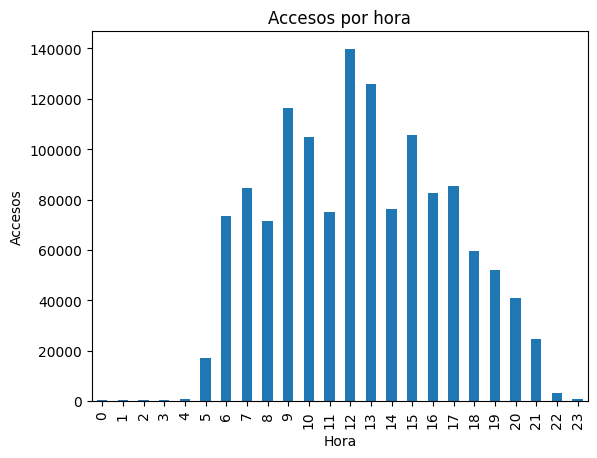

In [34]:
datos.groupby('hora')['TIPO_ACCESO'].count().plot(kind='bar')
plt.title('Accesos por hora')
plt.xlabel('Hora')
plt.ylabel('Accesos')
plt.show()


### ESTADISTICAS CLAVE

La siguiente grafica nos muestra la tasa de acceso, por tipo de acceso IN/OUT en todas las horas del dia. De aqui podemos ver que en la hora pico detectada anteriormente se tiene casi un 50/50 de distribucion entre accesos de entrada y salida. Mientras que en otros momentos como a las 6am la tasa de entrada es casi del 80%.

La segunda grafica muestra como se distribuye el acceso al edificio por roles a cada hora del dia. Evidentemente, el mayor porcentaje de accesos corresponde a estudiantes pero se puede observar que en la mañana y hacia medio dia tambien hay bastante ingreso de personal. 

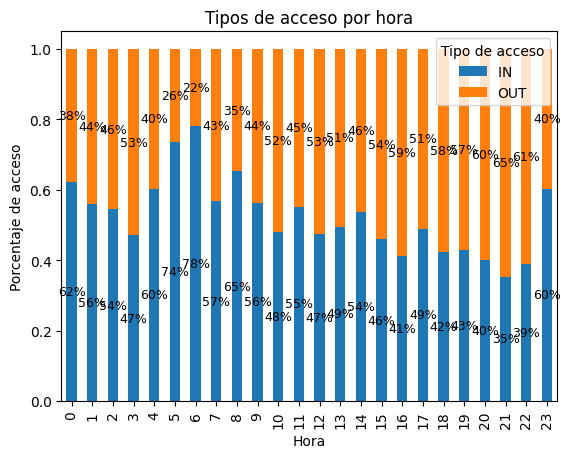

In [35]:
# Obtener tasa promedio de salidas y entradas por hora 
ax = datos.groupby('hora')['TIPO_ACCESO'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Tipos de acceso por hora')
plt.xlabel('Hora')
plt.ylabel('Porcentaje de acceso')
plt.legend(title='Tipo de acceso')

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0%}'.format(height), 
            fontsize=9,
            horizontalalignment='center', 
            verticalalignment='center')

plt.show()


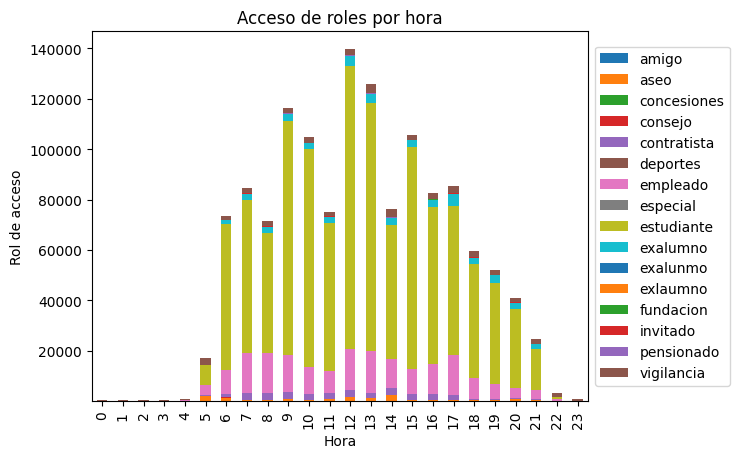

In [36]:
# Cuenta tipos de roles por hora
datos.groupby('hora')['ROL'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Acceso de roles por hora')
plt.xlabel('Hora')
plt.ylabel('Rol de acceso')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.56      0.65      0.60    207482
           1       0.55      0.45      0.49    194858

    accuracy                           0.55    402340
   macro avg       0.55      0.55      0.55    402340
weighted avg       0.55      0.55      0.55    402340



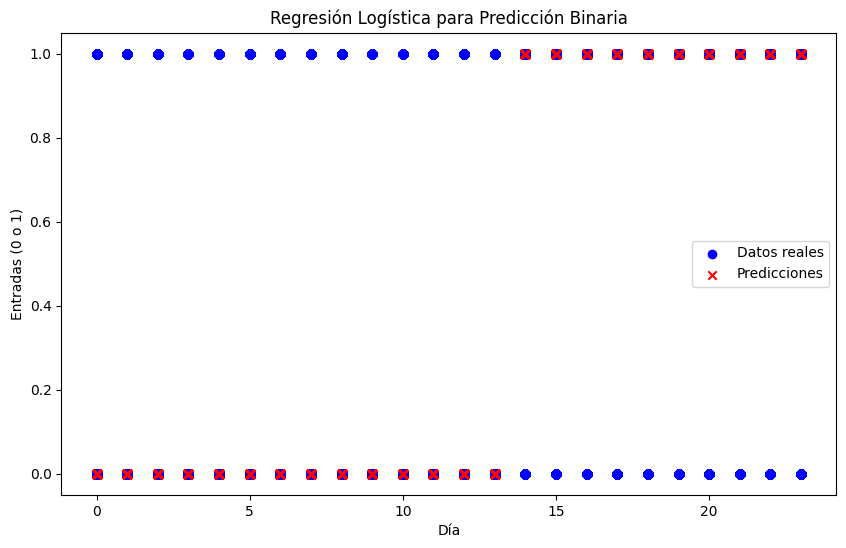

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(datos[['hora']], datos['TIPO_ACCESO_BINARIO'], test_size=0.3, random_state=0)

# Regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)


# Gráfico de los datos reales y las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(datos[['hora']], datos['TIPO_ACCESO_BINARIO'], label='Datos reales', color='blue', marker='o')
plt.scatter(X_test, predictions, label='Predicciones', color='red', marker='x')
plt.xlabel('Día')
plt.ylabel('Entradas (0 o 1)')
plt.title('Regresión Logística para Predicción Binaria')
plt.legend()
plt.show()